In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
metrics_path = "../data/predictions/model_metrics.csv"
preds_path = "../data/predictions/model_predictions.csv"

# Wczytanie
df_metrics = pd.read_csv(metrics_path)
df_preds = pd.read_csv(preds_path)

# Podgląd
print(df_metrics)
print(df_preds.head())

               Model      RMSE       MAE        R2
0         ElasticNet  0.097043  0.069834  0.892381
1              Ridge  0.099201  0.070536  0.887541
2           Ensemble  0.100410  0.069340  0.884782
3  Linear Regression  0.105716  0.074896  0.872286
4  Gradient Boosting  0.111384  0.078077  0.858222
5      Random Forest  0.111824  0.079441  0.857100
6            XGBoost  0.117059  0.077131  0.843406
      y_true  LinearRegression      Ridge  ElasticNet  RandomForest  \
0  11.686887         11.745219  11.742462   11.691596     11.619252   
1  12.081082         12.010947  12.097481   12.115460     12.009914   
2  11.736077         11.627245  11.684720   11.729813     11.694136   
3  12.271397         12.260587  12.199738   12.179868     12.214644   
4  11.886219         11.915219  11.925606   11.921504     11.913367   

   GradientBoosting    XGBoost   Ensemble  
0         11.637351  11.627607  11.664474  
1         12.029350  11.983101  12.072405  
2         11.754848  11.749182  1

### Tabela z metrykami

In [3]:
y_val = df_preds['y_true'].values

# Lista modeli
models = [col for col in df_preds.columns if col != 'y_true']

# Tworzenie nowej tabelki wyników z 4 metrykami
results = []
for name in models:
    pred = df_preds[name].values
    mse = mean_squared_error(y_val, pred)               # Mean Squared Error
    rmse = np.sqrt(mse)                                # Root Mean Squared Error
    mae = mean_absolute_error(y_val, pred)             # Mean Absolute Error
    r2 = r2_score(y_val, pred)                         # R² Score
    results.append([name, mse, rmse, mae, r2])

df_metrics = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])

df_metrics = df_metrics.sort_values(by='RMSE').reset_index(drop=True)

df_metrics

,Model,MSE,RMSE,MAE,R2
0,ElasticNet,0.009417,0.097043,0.069834,0.892381
1,Ridge,0.009841,0.099201,0.070536,0.887541
2,Ensemble,0.010082,0.100410,0.069340,0.884782
3,LinearRegression,0.011176,0.105716,0.074896,0.872286
4,GradientBoosting,0.012406,0.111384,0.078077,0.858222
5,RandomForest,0.012505,0.111824,0.079441,0.857100
6,XGBoost,0.013703,0.117059,0.077131,0.843406


In [4]:
best_model_name = df_metrics.iloc[0]['Model']
print("Najlepszy model:", best_model_name)

best_pred = df_preds[best_model_name].values
residuals = y_val - best_pred

Najlepszy model: ElasticNet


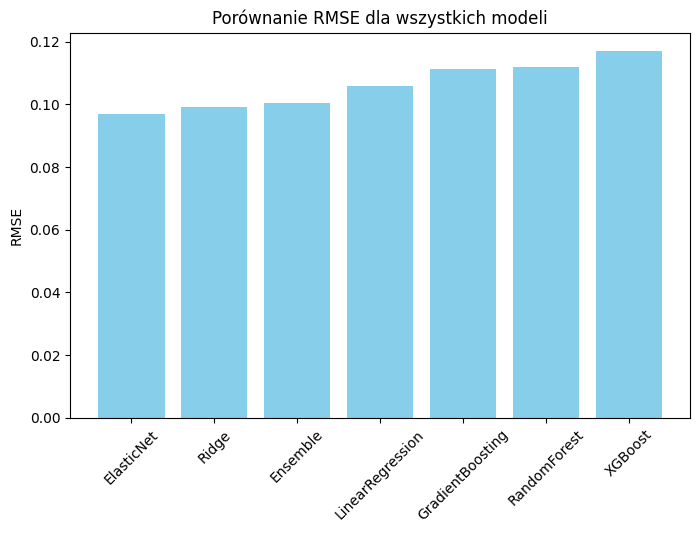

In [5]:
plt.figure(figsize=(8,5))
plt.bar(df_metrics["Model"], df_metrics["RMSE"], color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("RMSE")
plt.title("Porównanie RMSE dla wszystkich modeli")
plt.show()

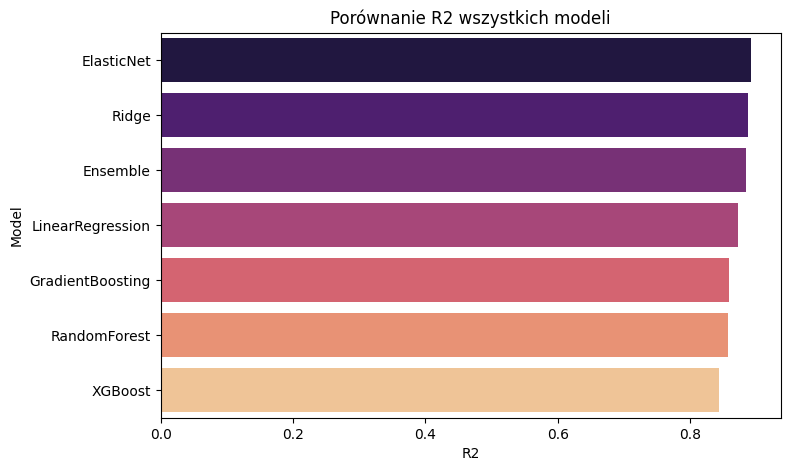

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(x='R2', y='Model', hue='Model', data=df_metrics, palette='magma')
plt.title('Porównanie R2 wszystkich modeli')
plt.show()

### Predykcje vs rzeczywiste wartości

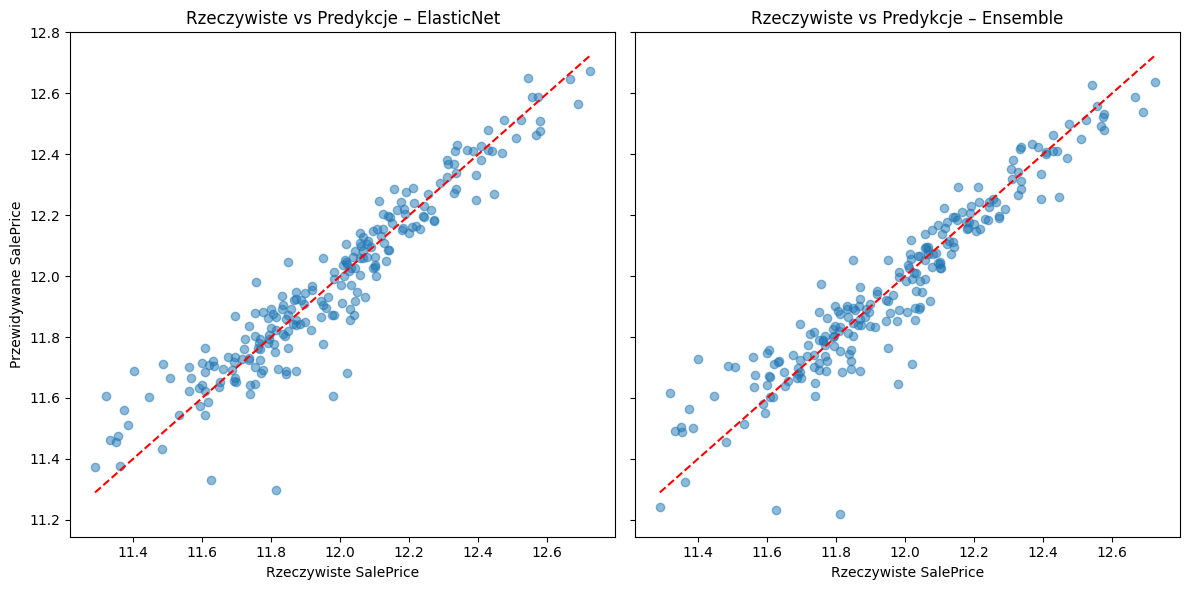

In [7]:
y_true = df_preds["y_true"]

best_model = "ElasticNet"
y_pred_best = df_preds[best_model]

y_pred_ensemble = df_preds["Ensemble"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axes[0].scatter(y_true, y_pred_best, alpha=0.5)
axes[0].plot(
    [y_true.min(), y_true.max()],
    [y_true.min(), y_true.max()],
    'r--'
)
axes[0].set_title(f"Rzeczywiste vs Predykcje – {best_model}")
axes[0].set_xlabel("Rzeczywiste SalePrice")
axes[0].set_ylabel("Przewidywane SalePrice")


axes[1].scatter(y_true, y_pred_ensemble, alpha=0.5)
axes[1].plot(
    [y_true.min(), y_true.max()],
    [y_true.min(), y_true.max()],
    'r--'
)
axes[1].set_title("Rzeczywiste vs Predykcje – Ensemble")
axes[1].set_xlabel("Rzeczywiste SalePrice")

plt.tight_layout()
plt.show()


### Histogram reszt

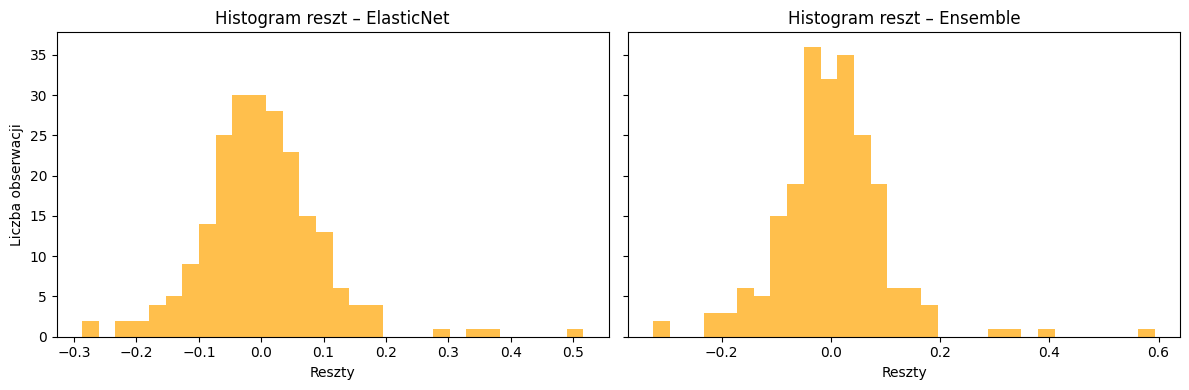

In [8]:
residuals_best = y_true - y_pred_best
residuals_ensemble = y_true - y_pred_ensemble


fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)


axes[0].hist(residuals_best, bins=30, color="orange", alpha=0.7)
axes[0].set_title(f"Histogram reszt – {best_model}")
axes[0].set_xlabel("Reszty")
axes[0].set_ylabel("Liczba obserwacji")


axes[1].hist(residuals_ensemble, bins=30, color="orange", alpha=0.7)
axes[1].set_title("Histogram reszt – Ensemble")
axes[1].set_xlabel("Reszty")

plt.tight_layout()
plt.show()


### Reszty vs predykcje

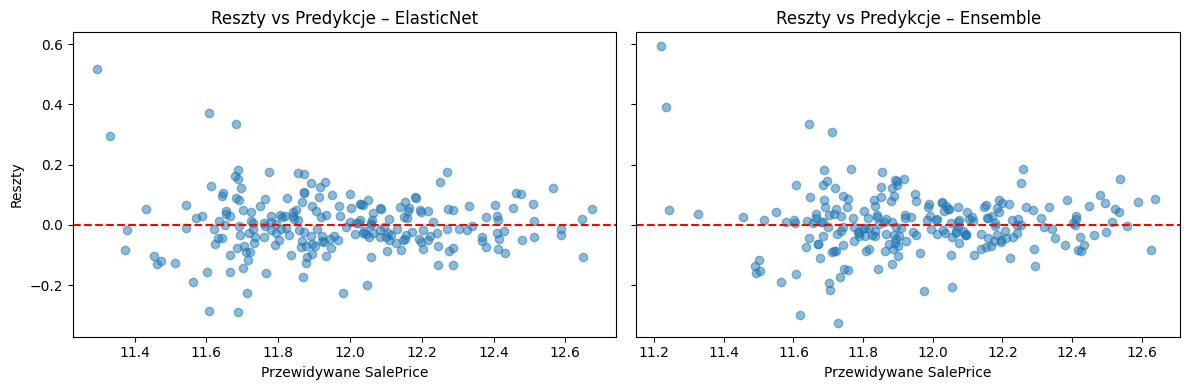

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axes[0].scatter(df_preds[best_model], residuals_best, alpha=0.5)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel("Przewidywane SalePrice")
axes[0].set_ylabel("Reszty")
axes[0].set_title(f"Reszty vs Predykcje – {best_model}")


axes[1].scatter(df_preds["Ensemble"], residuals_ensemble, alpha=0.5)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel("Przewidywane SalePrice")
axes[1].set_title("Reszty vs Predykcje – Ensemble")

plt.tight_layout()
plt.show()


### Ważność cech dla modeli drzewaistych


=== RandomForest – TOP 10 najważniejszych cech ===
       Feature  Importance
0  OverallQual    0.272357
1    GrLivArea    0.184973
2     FullBath    0.133158
3   GarageArea    0.056986
4    YearBuilt    0.056732
5     1stFlrSF    0.036916
6  TotalBsmtSF    0.033935
7   GarageCars    0.021271
8  OverallCond    0.019930
9      LotArea    0.014120


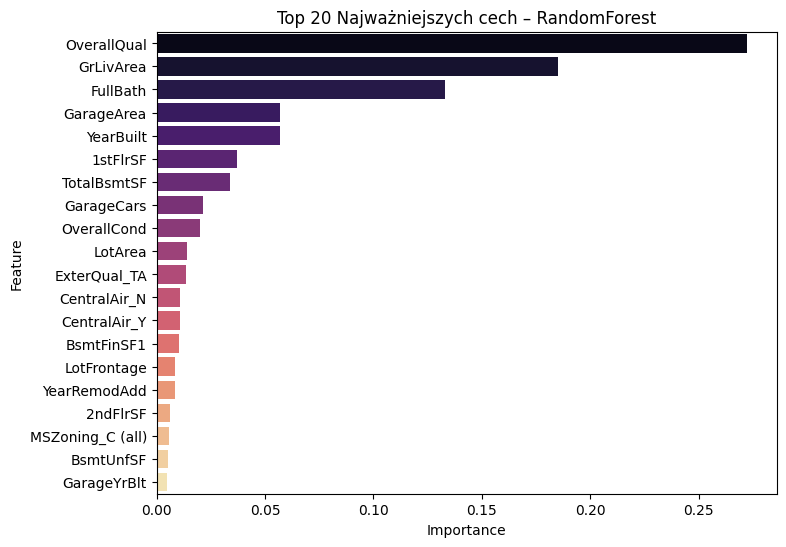


=== GradientBoosting – TOP 10 najważniejszych cech ===
        Feature  Importance
0   OverallQual    0.263838
1     GrLivArea    0.207234
2     YearBuilt    0.082969
3      FullBath    0.065436
4    GarageArea    0.060096
5   TotalBsmtSF    0.034100
6      1stFlrSF    0.032023
7    GarageCars    0.031120
8   OverallCond    0.029070
9  ExterQual_TA    0.019425


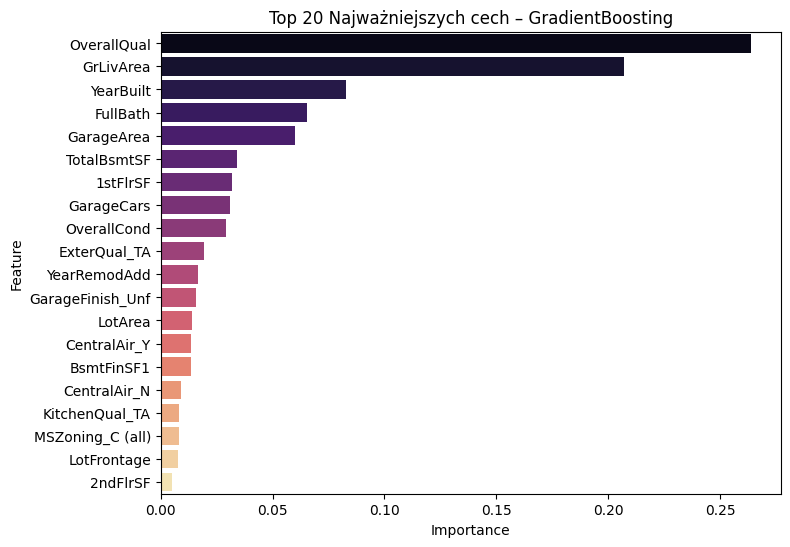


=== XGBoost – TOP 10 najważniejszych cech ===
            Feature  Importance
0          FullBath    0.193067
1      ExterQual_TA    0.117318
2       OverallQual    0.115006
3      CentralAir_N    0.068251
4        GarageCars    0.062177
5         GrLivArea    0.035621
6  GarageFinish_Unf    0.031937
7    KitchenQual_TA    0.029441
8      CentralAir_Y    0.016777
9       MSZoning_RL    0.014466


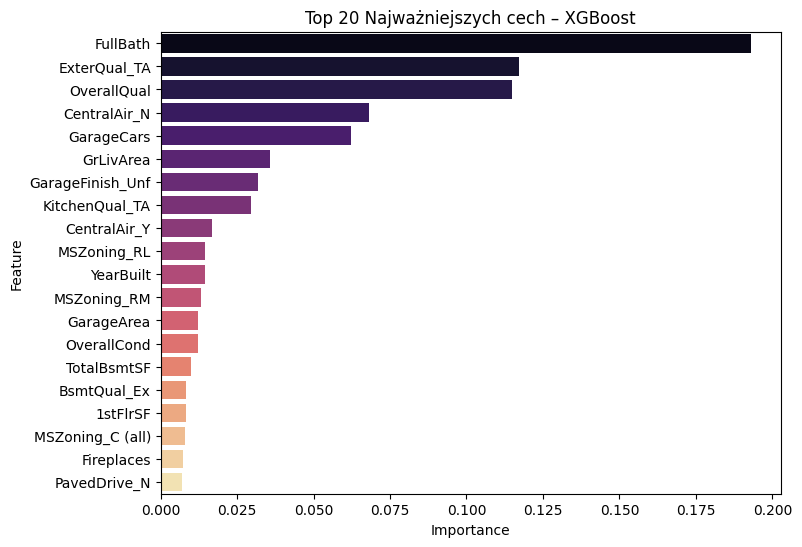

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

modelsTree = ["RandomForest", "GradientBoosting", "XGBoost"]

dfs = []  # <-- tu zbieramy importance

for model in modelsTree:
    path = f"../data/predictions/{model}_feature_importance.csv"
    df = pd.read_csv(path)

    print(f"\n=== {model} – TOP 10 najważniejszych cech ===")
    print(df.head(10))

    # wykres dla pojedynczego modelu
    plt.figure(figsize=(8,6))
    sns.barplot(
        x="Importance",
        y="Feature",
        data=df.head(20),
        hue="Feature",
        palette="magma",
        legend=False
    )
    plt.title(f"Top 20 Najważniejszych cech – {model}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

    # dodanie kolumny z nazwą modelu i zapis do listy
    df_tmp = df.copy()
    df_tmp["Model"] = model
    dfs.append(df_tmp)


In [11]:
# Połączenie wszystkich modeli
df_all = pd.concat(dfs, ignore_index=True)

# Średnia importance dla każdej cechy
df_mean = (
    df_all
    .groupby("Feature")["Importance"]
    .mean()
    .reset_index()
    .sort_values(by="Importance", ascending=False)
)

print("\n=== UŚREDNIENIE WAŻNOŚCI CECH – TOP 10 ===")
print(df_mean.head(10))



=== UŚREDNIENIE WAŻNOŚCI CECH – TOP 10 ===
          Feature  Importance
205   OverallQual    0.217067
127     GrLivArea    0.142610
101      FullBath    0.130554
241     YearBuilt    0.051349
64   ExterQual_TA    0.050089
108    GarageArea    0.043149
109    GarageCars    0.038190
38   CentralAir_N    0.029363
237   TotalBsmtSF    0.026004
0        1stFlrSF    0.025783
